# **Import Libraries and modules**

In [34]:
# https://keras.io/
!pip install -q keras

import keras

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import os

import matplotlib
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.utils import np_utils
from keras.regularizers import l2

from keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam

#from helper import plot_model, predict_classes, visualize_errors


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


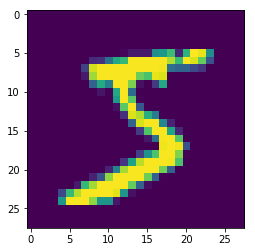

In [37]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [40]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [42]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
from keras.layers import Activation

model = Sequential()

model.add(Convolution2D(10, 3, 3, kernel_regularizer = l2(0.01), input_shape=(28,28,1))) # 26,26,10, params = 100
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer= l2(0.01))) # 24,24,20, params = 1820
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.01))) # 22,22,20, params = 3620
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11,11,20, 

model.add(Convolution2D(10, 1, 1, kernel_regularizer=l2(0.01))) # 11,11,10, params = 210
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01))) # 9,9,16, params = 1456 
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01))) # 7,7,16, params = 2320
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01))) # 5,5,16, params = 2320
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, kernel_regularizer=l2(0.01))) # 5,5,10, params = 170
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 5)) #1,1,10, params = 2510

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regula

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 20)        3620      
__________

#ModelCheckPoint



*  It is used to save the model after every epoch
*  It is passed as a callback in fit()
*  Here we define several params to help us save the required data
    *  File Path & Name
    *  Metric to Monitor
    *  verbosity 
    *  save_best_only = True, will save only the best weights
    *  Mode is either ( min, max or auto), it can be assigned based on the metric to monitor. If it val_acc then we give max, if val_loss is given we give min, if auto is the mode then its direction inferred based on the metric automatically.




In [0]:
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/The School of AI/Assignments/Assignment5/best_model.h5', monitor='val_loss', verbose=1, save_best_only= True, mode='auto')

#Iterator

*   We need to use the image data generator to generate the normalized images, since we train the images in batches. We need to iterate through the images in batches. 
*   We created iterators for training and testing data and these will be used to pass the data for the fit_generator function
*   We need to use fit_generator() instead of fit(). Typically, fit() is used if x & y are passed directly and for smaller data sets. we use fit_generator() if the data is coming from a generator.
    *   Steps_per_epoch
    *   validation_steps



In [46]:
def scheduler(epoch, lr):
 return round(0.003 * 1/(1 + 0.319 * epoch), 10)

train_iterator = datagen.flow(X_train, Y_train, batch_size=128, shuffle=False)
val_iterator = datagen.flow(X_test, Y_test, batch_size=128, shuffle=False)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model_details = model.fit_generator(train_iterator, verbose=1,steps_per_epoch = 512, nb_epoch=40, 
                    validation_data=val_iterator, validation_steps = 64,
                    callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=512, validation_data=<keras_pre..., validation_steps=64, callbacks=[<keras.ca..., epochs=40)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
512/512 [==============================] - 17s 33ms/step - loss: 0.5505 - acc: 0.9361 - val_loss: 0.9474 - val_acc: 0.7104

Epoch 00001: val_loss improved from inf to 0.94735, saving model to /content/gdrive/My Drive/The School of AI/Assignments/Assignment5/best_model.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
512/512 [==============================] - 14s 27ms/step - loss: 0.1572 - acc: 0.9762 - val_loss: 0.2030 - val_acc: 0.9593

Epoch 00002: val_loss improved from 0.94735 to 0.20298, saving model to /content/gdrive/My Drive/The School of AI/Assignments/Assignment5/best_model.h5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
512/512 [==============================] - 14s 26ms/step - loss: 0.1219 - acc: 0.9811 - val_loss: 0.2171 - val_acc: 0.9479

Epoch 00003: val_loss did not improve from 0.20298
Epoch 4/40

Epoch 00004: LearningRate

In [79]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(type(score))



<class 'list'>


In [48]:
print(score)

[0.041098254616558555, 0.9921]


In [0]:
#class_pred = model.predict_generator(val_iterator, steps = 10000/128)

class_pred = model.predict(X_test)

In [86]:
y_pred = np.argmax(np.round(class_pred), axis = 1)
print(y_pred, y_test)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


In [87]:
data = {'actual': y_test, 'predicted': y_pred}
print(len(y_test))
print(len(y_pred))
print(y_test.shape)

df = pd.DataFrame(data)

y_misclassfied = df[(df.actual != df.predicted)]

print(y_misclassfied)



10000
10000
(10000,)
      actual  predicted
211        5          0
290        8          4
321        2          7
340        5          3
449        3          5
551        7          9
571        4          9
582        8          2
646        2          0
659        2          1
689        7          1
947        8          9
1014       6          5
1232       9          4
1247       9          0
1260       7          1
1299       5          7
1414       9          4
1553       9          0
1681       3          7
1737       5          0
1880       6          0
1901       9          4
1903       7          3
1940       5          7
2035       5          3
2070       7          9
2118       6          1
2130       4          9
2135       6          1
...      ...        ...
4271       5          3
4443       3          1
4497       8          7
4571       6          0
4639       8          9
4699       6          1
4740       3          5
4838       6          5
4860       4       

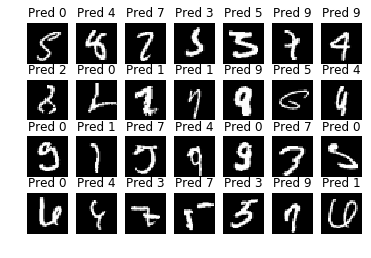

In [156]:
incorrect = np.where(y_pred!= y_test)[0]

#print ("Found %d incorrect labels" % len(incorrect))

for i, incorrect in enumerate(incorrect[:28]):
    plt.subplot(4,7,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred {}".format(y_pred[incorrect]), )
    #plt.tight_layout(True)
    plt.axis('off')

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_144'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28,1)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()